
[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


NaN value streaks in data source







Column: airTemperature
28

Column: cloudCoverage
230

Column: dewTemperature
28

Column: windDirection
28

Column: windSpeed
28




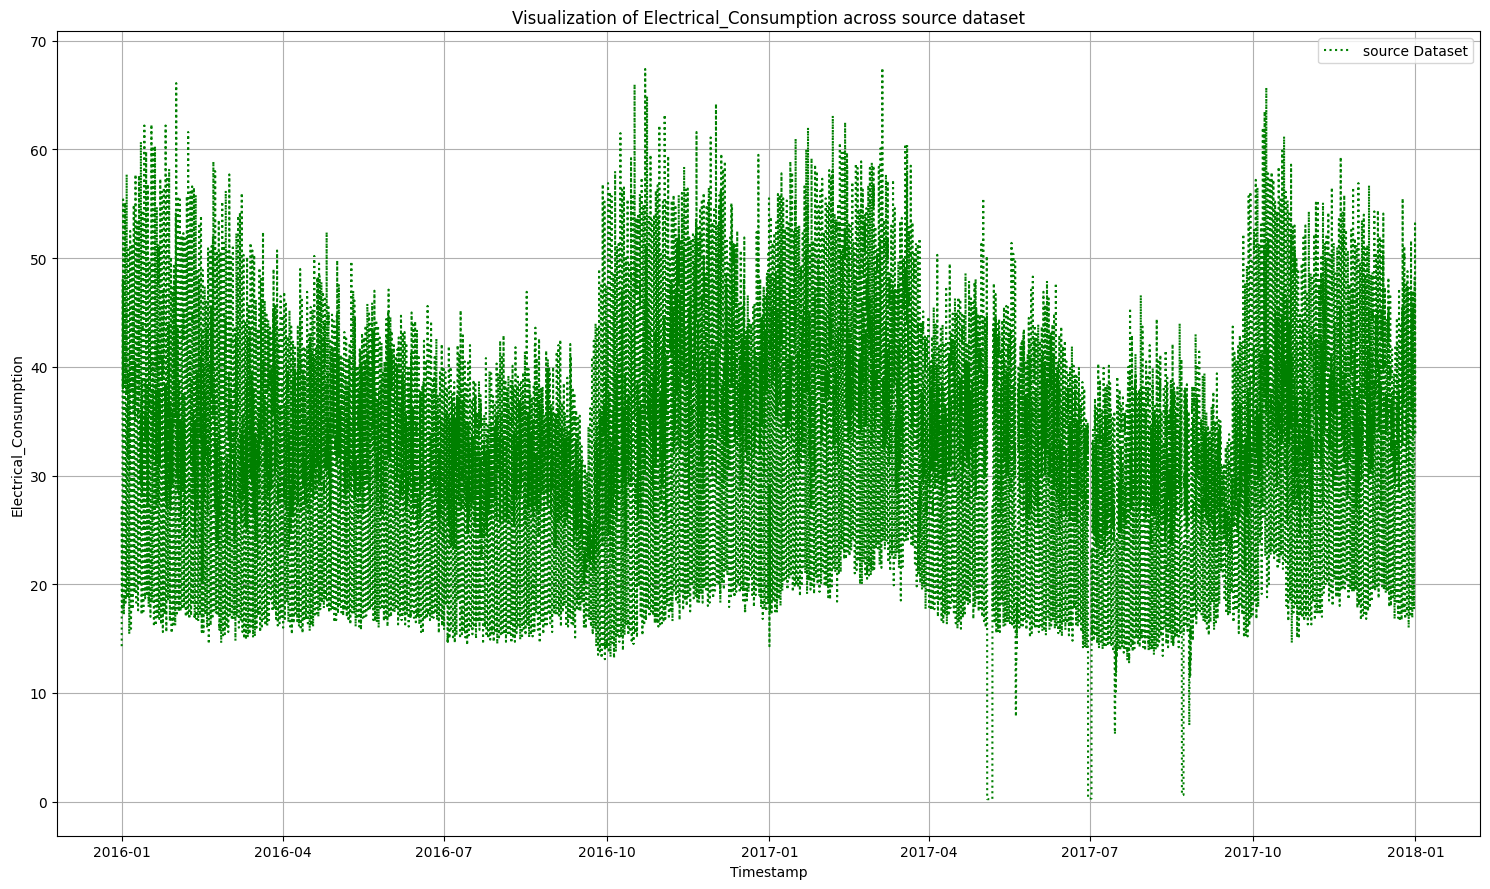

Filling NaN values in data source

Fixing outliers in data source



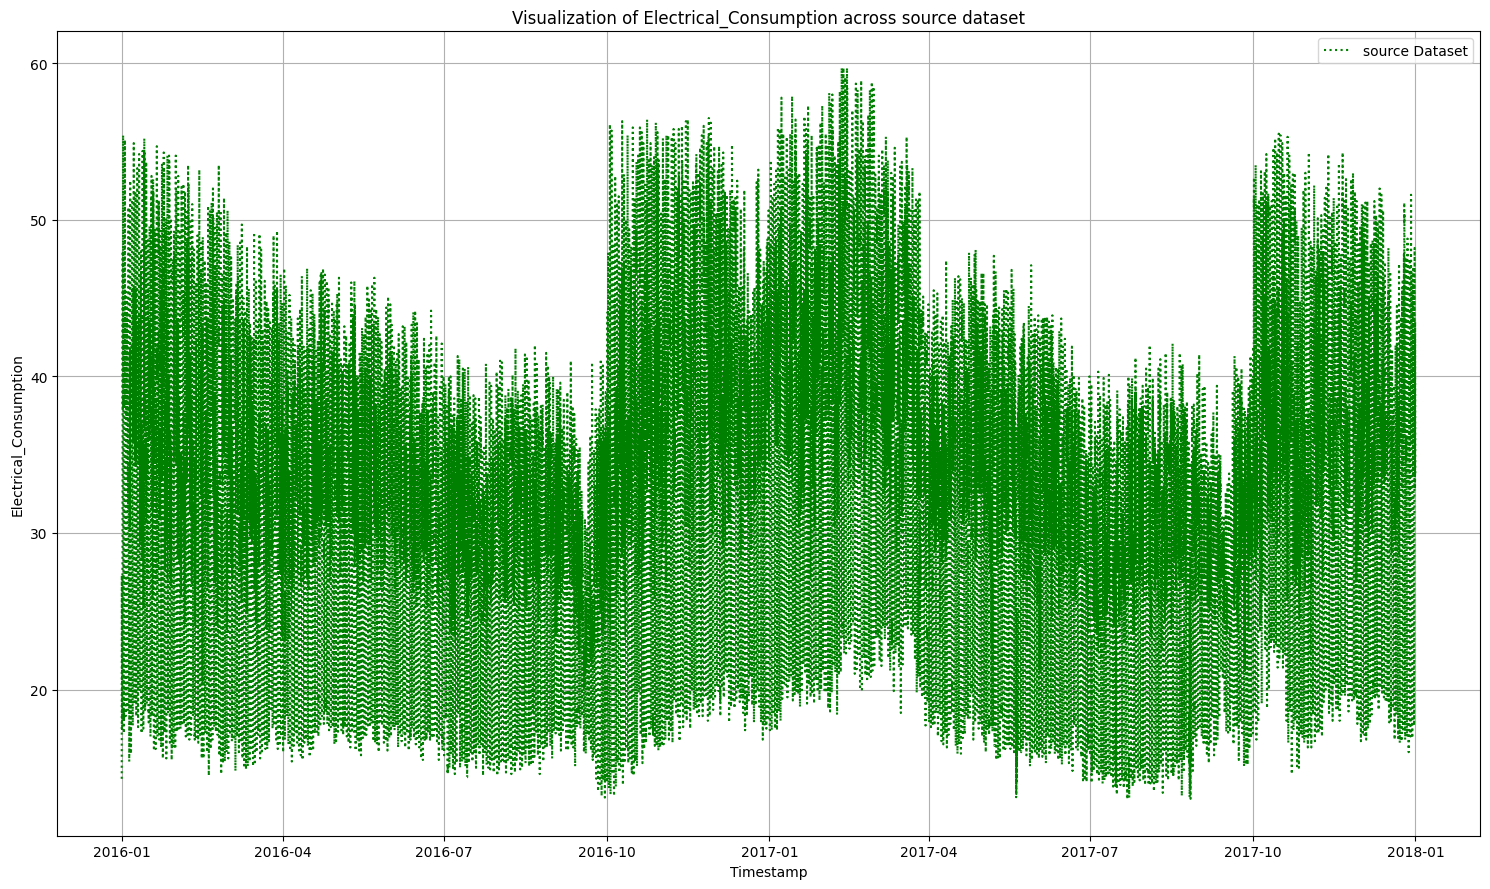













NaN value streaks in data target







Column: airTemperature
1

Column: cloudCoverage
12

Column: dewTemperature
1

Column: windDirection
5

Column: windSpeed
1

Column: Electrical_Consumption
1



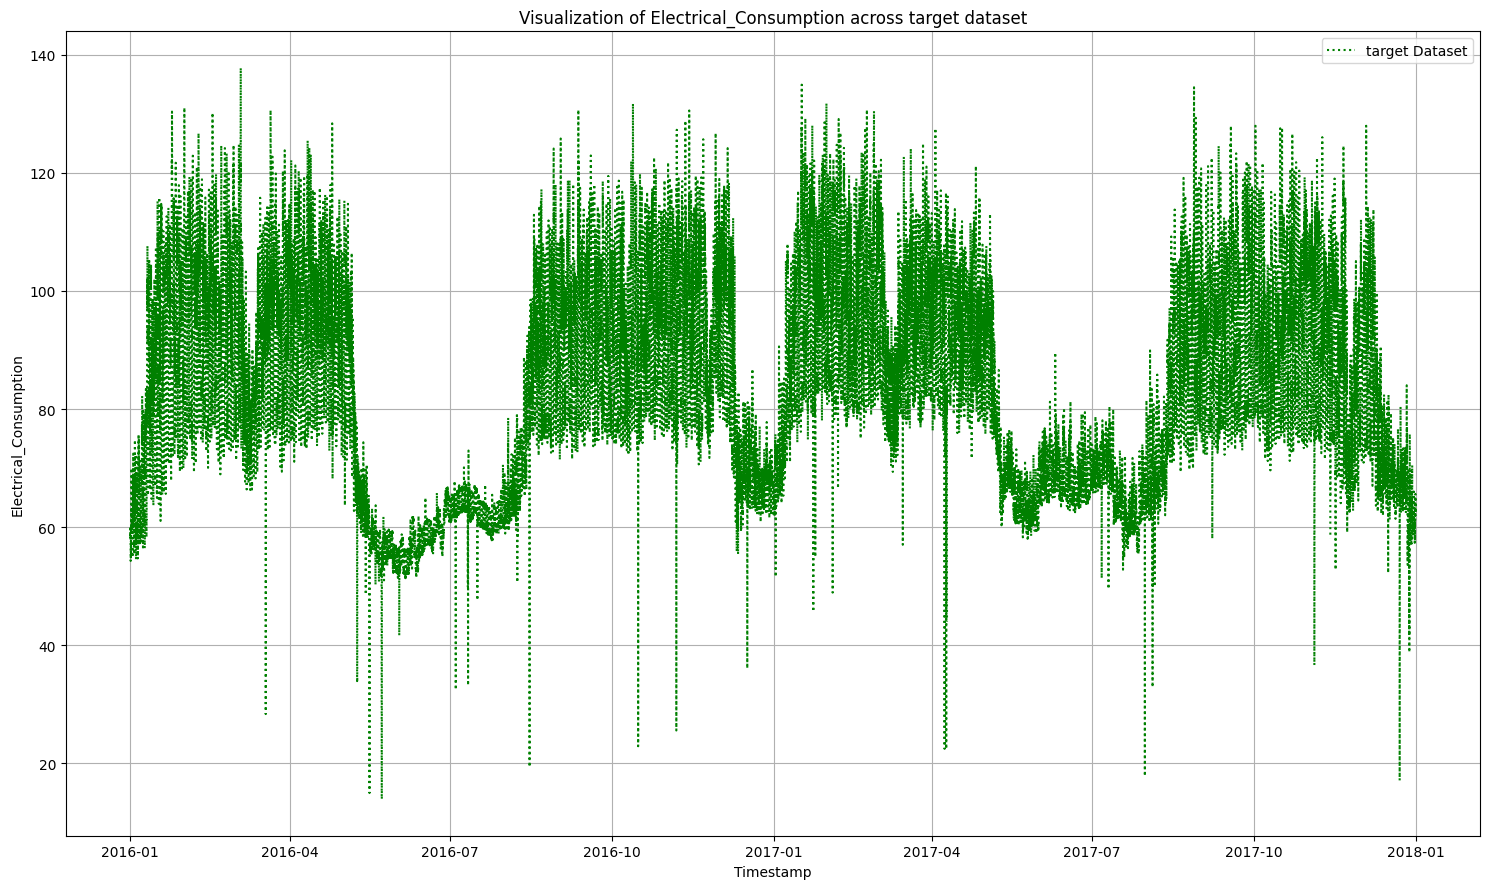

Filling NaN values in data target

Fixing outliers in data target



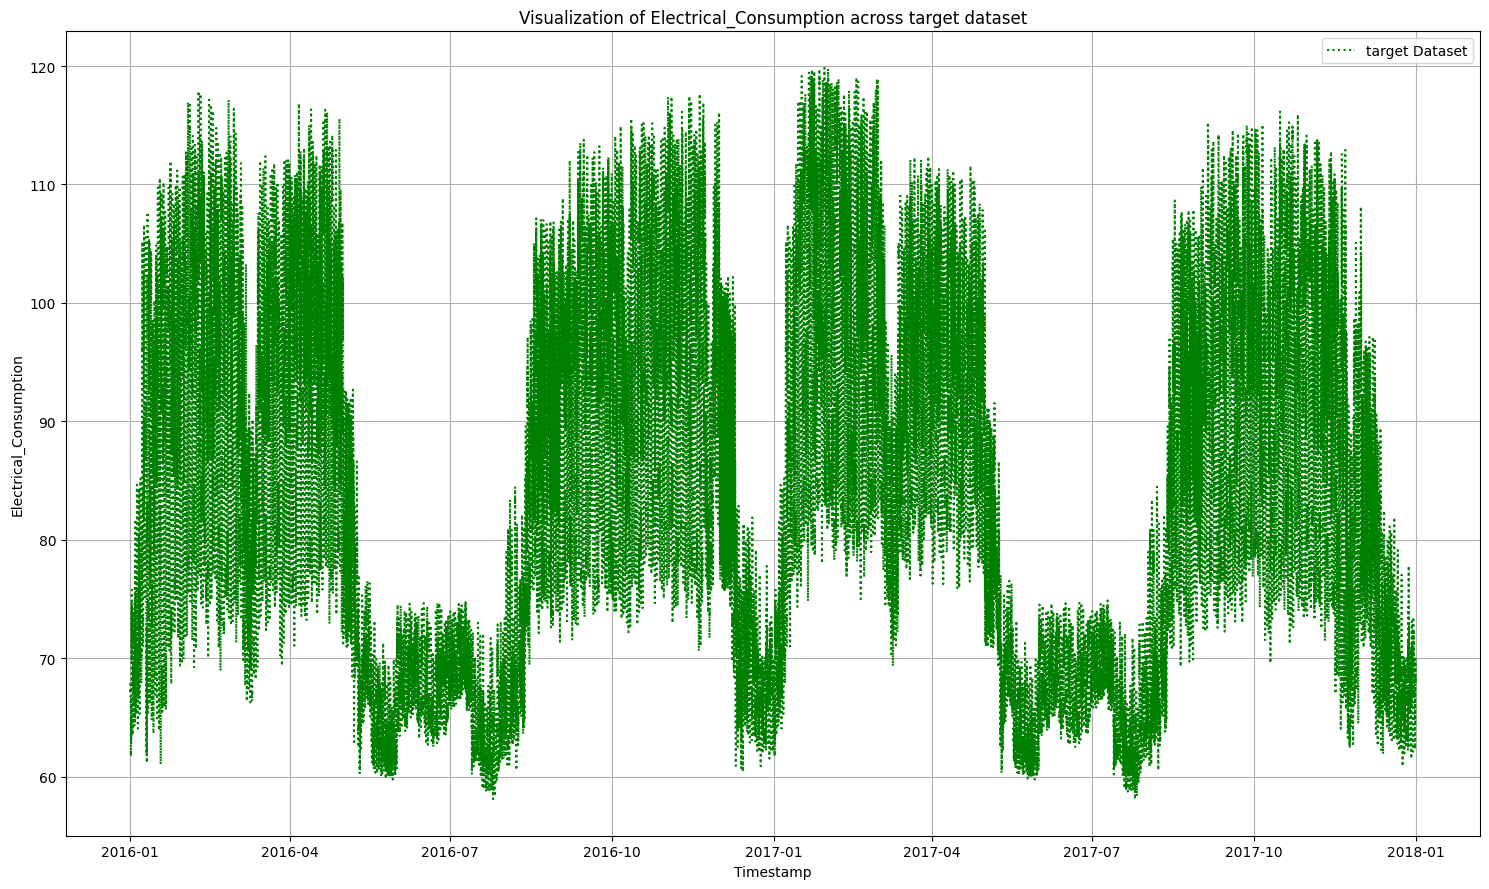













NaN value streaks in data target 2







Column: airTemperature
3

Column: cloudCoverage
11

Column: dewTemperature
3

Column: windDirection
4


Column: Electrical_Consumption
2923



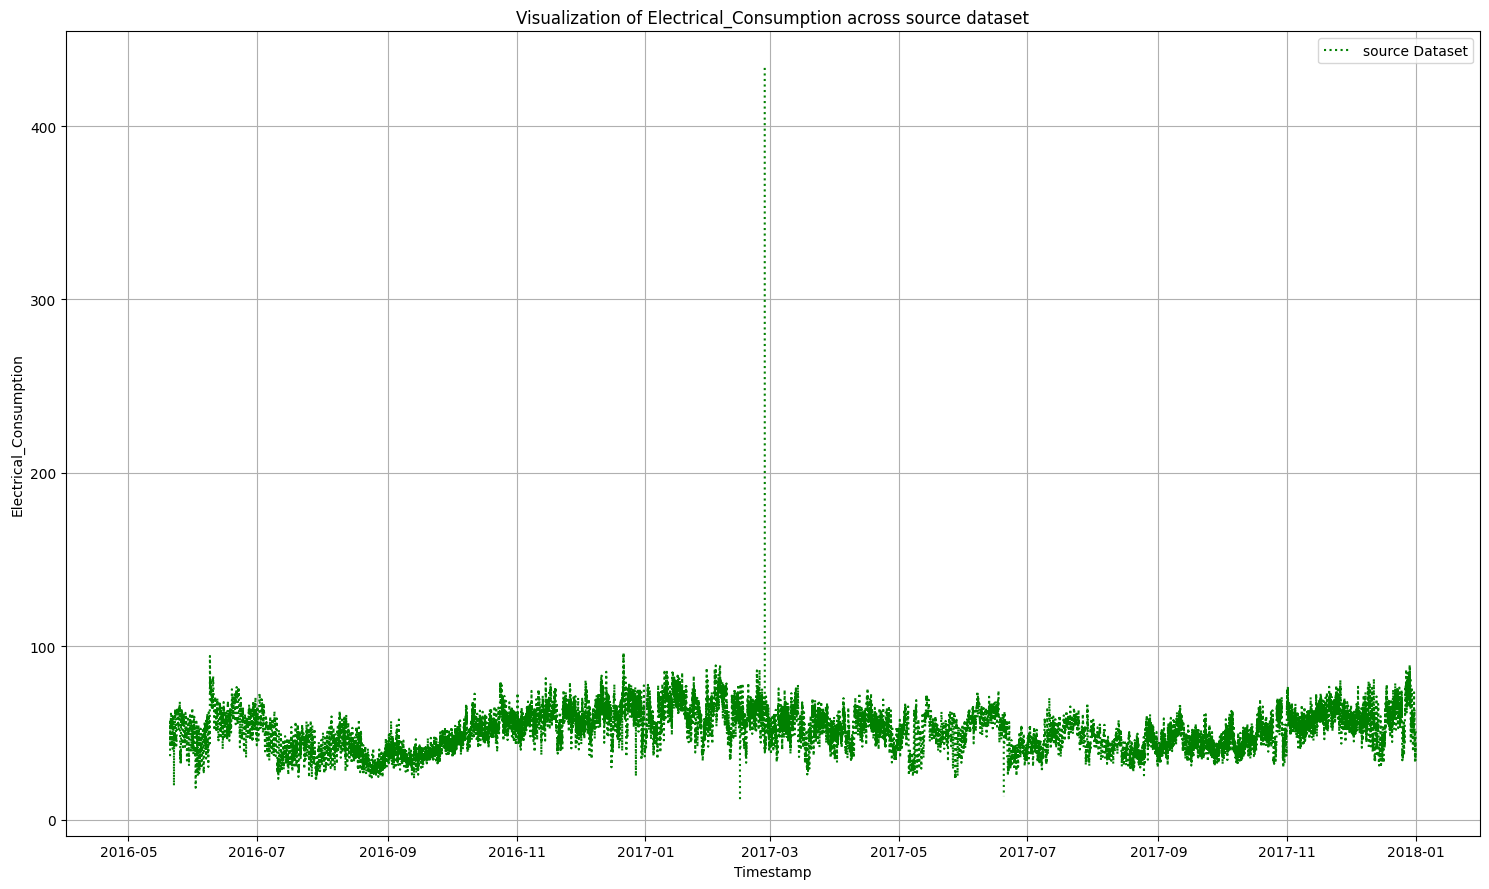

Filling NaN values in data target 2

Fixing outliers in data target 2



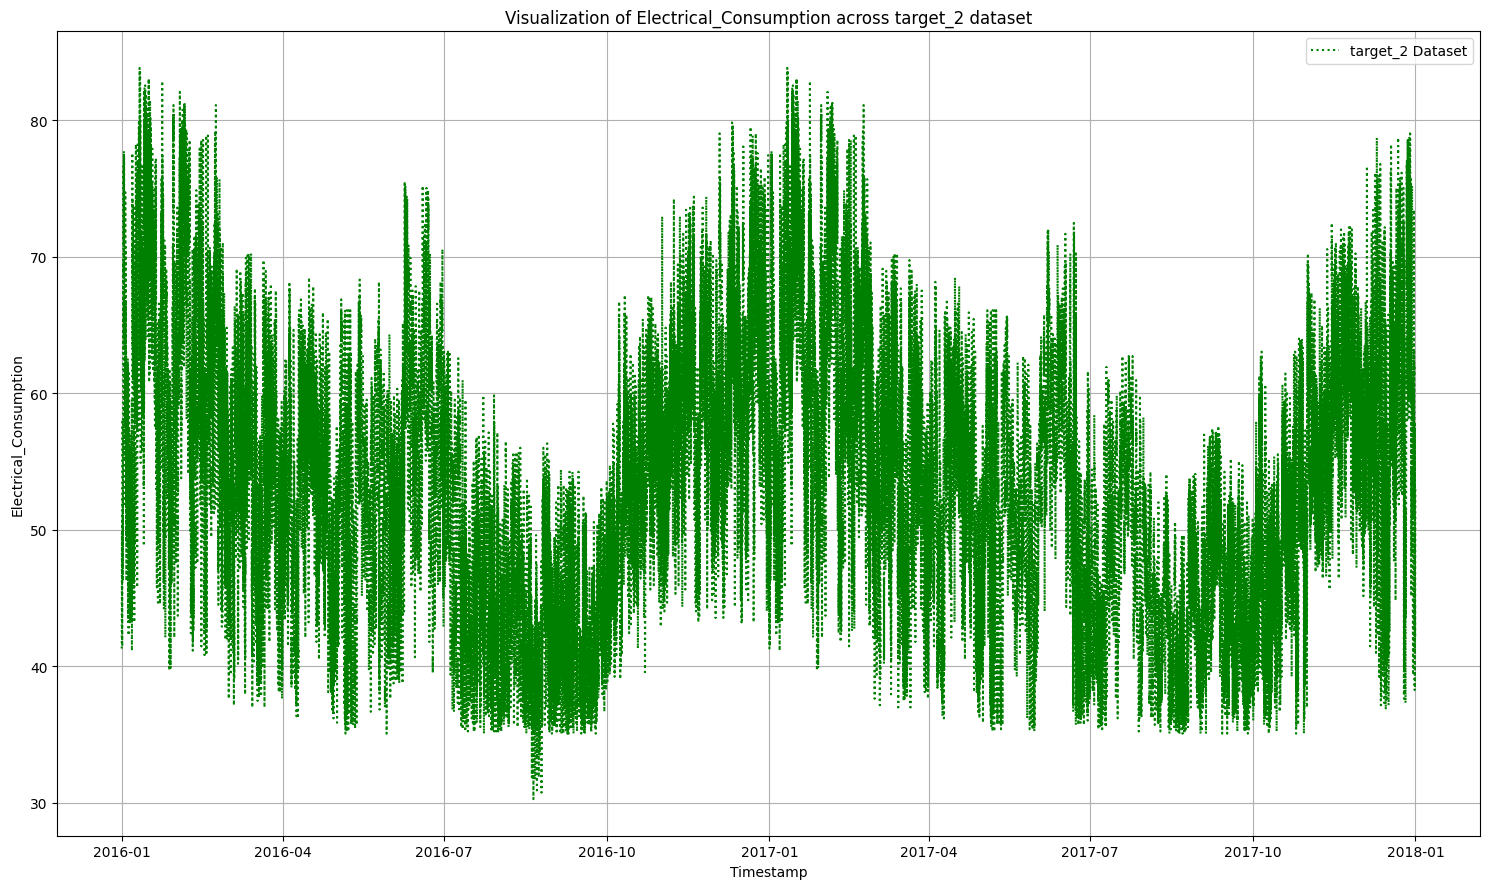













       time_index month       lat       lng  yearbuilt  airTemperature  \
0               0     1  0.030687  0.004452        1.0        0.006450   
1               1     1  0.030687  0.004452        1.0        0.006400   
2               2     1  0.030687  0.004452        1.0        0.005841   
3               3     1  0.030687  0.004452        1.0        0.005536   
4               4     1  0.030687  0.004452        1.0        0.005688   
...           ...   ...       ...       ...        ...             ...   
14030       14030     8  0.030687  0.004452        1.0        0.012240   
14031       14031     8  0.030687  0.004452        1.0        0.012393   
14032       14032     8  0.030687  0.004452        1.0        0.012748   
14033       14033     8  0.030687  0.004452        1.0        0.012545   
14034       14034     8  0.030687  0.004452        1.0        0.012240   

       cloudCoverage  dewTemperature  windDirection  \
0            0.00452        0.005739       0

C:\Users\Drakn\AppData\Local\Temp\ipykernel_8884\1423201210.py:699: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_source["Electrical_Consumption/sqm"] = pd.Series(scaled_values_train.flatten(), index=train_source.index)
C:\Users\Drakn\AppData\Local\Temp\ipykernel_8884\1423201210.py:700: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_source["Electrical_Consumption/sqm"] = pd.Series(scaled_values_test.flatten(), index=test_source.index)
C:\Users\Drakn\AppData\Local\Temp\ipykernel_8884\1423201210.py:

In [ ]:
!pip install scikit-learn==1.3.2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import math
import json
import pickle
import joblib
from sklearn.preprocessing import MinMaxScaler



#read data files

data_source = pd.read_pickle('Data/Final data/data_source.pkl')
data_target = pd.read_pickle('Data/Final data/data_target.pkl')
data_target_2 = pd.read_pickle('Data/Final data/data_target_2.pkl')


#Function that checks for NaN values in each column

def check_nan_intervals(df,mode):
    for column in df.columns:

        # Get a boolean series indicating where NaN values are
        nan_series = df[column].isna()

        # Find the indices where NaN values start and end
        nan_starts = nan_series[(nan_series != nan_series.shift(1)) & nan_series].index
        nan_ends = nan_series[(nan_series != nan_series.shift(-1)) & nan_series].index

        # Print the intervals
        longest_NaN_streak = 0
        for start, end in zip(nan_starts, nan_ends):
            if (longest_NaN_streak < end-start+1):
                longest_NaN_streak = end-start+1
            if (mode == 'NaN ANALYTICS'):
              print(f"Column: {column}")
              print(f"NaN values from row {start} to {end}")

        # Check if there are trailing NaNs till the end of the dataframe
        if nan_series.iloc[-1]:
            if (longest_NaN_streak < len(df) - nan_starts[-1]):
              longest_NaN_streak = len(df) - nan_starts[-1]
            if (mode == 'NaN ANALYTICS'):
              print(f"NaN values from row {nan_starts[-1]} to the end")

        if (mode == 'NaN STREAK'):
            if longest_NaN_streak > 0:
                print(f"Column: {column}")
                print(longest_NaN_streak)
        # Extra line for better readability
        print()


#Function that imputates NaN values in a dataframe's column based on NaN values spread

def check_longest_nan_streak_and_imputate(df,dataset):
    for column in df.columns:

        if (column != 'Electrical_Consumption' and dataset == 'source'):
            print(f"Column: {column}")

            # Get a boolean series indicating where NaN values are
            nan_series = df[column].isna()

            # Find the indices where NaN values start and end
            nan_starts = nan_series[(nan_series != nan_series.shift(1)) & nan_series].index
            nan_ends = nan_series[(nan_series != nan_series.shift(-1)) & nan_series].index

            # Print the intervals
            longest_NaN_streak = 0
            for start, end in zip(nan_starts, nan_ends):
                if (longest_NaN_streak < end - start + 1):
                    longest_NaN_streak = end - start + 1

            # Check if there are trailing NaNs till the end of the dataframe
            if nan_series.iloc[-1]:
                if (longest_NaN_streak < len(df) - nan_starts[-1]+1):
                  longest_NaN_streak = len(df) - nan_starts[-1]+1

            print(longest_NaN_streak)

            if longest_NaN_streak > 0:

                mov_avg_window = longest_NaN_streak + 2

                col_data = df[column].copy()

                # Apply moving average imputation
                imputed_col = col_data.rolling(window=mov_avg_window, min_periods=1).mean()

                # Fill NaN values with the computed moving average
                col_data.fillna(imputed_col, inplace=True)

                col_data.fillna(method='bfill', inplace=True)

                # Update the original DataFrame with the imputed values
                df[column] = col_data

                print(f"Column : {column} is imputated")

                # Extra line for better readability
                print()

        elif (column == 'Electrical_Consumption' and (dataset == 'source' or dataset == 'target')):
            print(f"Column: {column}")

            # Get a boolean series indicating where NaN values are
            nan_series = df[column].isna()

            # Find the indices where NaN values start and end
            nan_starts = nan_series[(nan_series != nan_series.shift(1)) & nan_series].index
            nan_ends = nan_series[(nan_series != nan_series.shift(-1)) & nan_series].index

            # Print the intervals
            longest_NaN_streak = 0
            for start, end in zip(nan_starts, nan_ends):
                if (longest_NaN_streak < end - start + 1):
                    longest_NaN_streak = end - start + 1

            # Check if there are trailing NaNs till the end of the dataframe
            if nan_series.iloc[-1]:
                if (longest_NaN_streak < len(df) - nan_starts[-1]+1):
                  longest_NaN_streak = len(df) - nan_starts[-1]+1

            print(longest_NaN_streak)

            if longest_NaN_streak > 0:
                for i in range(len(df)):
                    if pd.isnull(df.at[i, column]):
                        value = 'NaN'
                        back = i
                        front = i
                        while (value != 'Imputated'):
                            if (front+24 < len(df)):
                                front = front+24
                                if pd.notnull(df.at[front, column]):
                                    df.at[i, column] = df.at[front, column]
                                    value = 'Imputated'
                            elif (back-24 > -1):
                                back = back-24
                                if pd.notnull(df.at[back, column]):
                                    df.at[i, column] = df.at[back, column]
                                    value = 'Imputated'
                print(f"Column : {column} is imputated")

                # Extra line for better readability
                print()

        elif (column != 'CloudCoverage' and (dataset == 'target' or dataset == 'target_2')):
            print(f"Column: {column}")

            # Get a boolean series indicating where NaN values are
            nan_series = df[column].isna()

            # Find the indices where NaN values start and end
            nan_starts = nan_series[(nan_series != nan_series.shift(1)) & nan_series].index
            nan_ends = nan_series[(nan_series != nan_series.shift(-1)) & nan_series].index

            # Print the intervals
            longest_NaN_streak = 0
            for start, end in zip(nan_starts, nan_ends):
                if (longest_NaN_streak < end - start + 1):
                    longest_NaN_streak = end - start + 1

            # Check if there are trailing NaNs till the end of the dataframe
            if nan_series.iloc[-1]:
                if (longest_NaN_streak < len(df) - nan_starts[-1]+1):
                  longest_NaN_streak = len(df) - nan_starts[-1]+1

            print(longest_NaN_streak)

            if longest_NaN_streak > 0:

                mov_avg_window = longest_NaN_streak + 2

                col_data = df[column].copy()

                # Apply moving average imputation
                imputed_col = col_data.rolling(window=mov_avg_window, min_periods=1).mean()

                # Fill NaN values with the computed moving average
                col_data.fillna(imputed_col, inplace=True)

                col_data.fillna(method='bfill', inplace=True)

                # Update the original DataFrame with the imputed values
                df[column] = col_data

                print(f"Column : {column} is imputated")

                # Extra line for better readability
                print()

        elif (column == 'CloudCoverage' and (dataset == 'target' or dataset == 'target_2')):

            df[column] = df[column].interpolate(method='spline', order=3)

            print(f"Column : {column} is imputated")

            # Extra line for better readability
            print()


def strip_leading_zeros(x):
    return int(x.lstrip('0')) if isinstance(x, str) else x



def train_test_split(data):

    split = 0.8

    train = data.iloc[:int(len(data)*split),:]
    test = data.iloc[int(len(data)*split):,:]
    return train,test



def adjust_value(val, mean, lower_bound, upper_bound):
        if val < lower_bound:
            return mean + (val - lower_bound)/2  # Scale up the value closer to the mean
        elif val > upper_bound:
            return mean + (val - upper_bound)/2  # Scale down the value closer to the mean
        else:
            return val


def tweak_outliers(data, level, feature):
    while level > 0:
        for year in range (2016, 2018):
            for month in range(1,13):
                if month < 12:
                    value_list = data[(data['timestamp'] >= datetime(year, month, 1, 0, 0, 0)) & (data['timestamp'] <= datetime(year,month+1, 1, 0, 0, 0))][feature]
                    mean = value_list.mean()
                    std_dev = value_list.std()
                    lower_bound = mean - 2 * std_dev
                    upper_bound = mean + 2 * std_dev
                    for i in data.index:
                        if data.loc[i, 'timestamp'] >= datetime(year, month, 1, 0, 0, 0) and data.loc[i, 'timestamp'] < datetime(year, month+1, 1, 0, 0, 0) :
                            data.loc[i, feature] = adjust_value(data.loc[i, feature], mean, lower_bound, upper_bound)

                elif month == 12:
                    value_list = data[(data['timestamp'] >= datetime(year, month, 1, 0, 0, 0)) & (data['timestamp'] <= datetime(year+1, 1, 1, 0, 0, 0))][feature]
                    mean = value_list.mean()
                    std_dev = value_list.std()
                    lower_bound = mean - 2 * std_dev
                    upper_bound = mean + 2 * std_dev
                    for i in data.index:
                        if data.loc[i, 'timestamp'] >= datetime(year, month, 1, 0, 0, 0) and data.loc[i, 'timestamp'] < datetime(year+1, 1, 1, 0, 0, 0) :
                            data.loc[i, feature] = adjust_value(data.loc[i, feature], mean, lower_bound, upper_bound)


        level = level - 1

def fix_nans(data, feature):
    for i in range(len(data)):
        if math.isnan(data.loc[i, feature]):
            if i < 8784:
                data.loc[i, feature] = data_source[data_source["timestamp"]==data_source.loc[i, "timestamp"]+pd.DateOffset(years= 1)][feature].item()
            elif i >= 8784:
                data.loc[i, feature] = data_source[data_source["timestamp"]==data_source.loc[i, "timestamp"]-pd.DateOffset(years= 1)][feature].item()

            if math.isnan(data.loc[i, feature]):
                if i+24 < len(data_source):
                    data.loc[i, feature] = data_source[data_source["timestamp"]==data_source.loc[i, "timestamp"]+pd.DateOffset(days= 1)][feature].item()

                if i-24 >= 0 and math.isnan(data.loc[i, feature]):
                    data.loc[i, feature] = data_source[data_source["timestamp"]==data_source.loc[i, "timestamp"]-pd.DateOffset(days= 1)][feature].item()

                if math.isnan(data.loc[i, feature]):
                    if i+48 < len(data_source):
                        data.loc[i, feature] = data_source[data_source["timestamp"]==data_source.loc[i, "timestamp"]+pd.DateOffset(days= 2)][feature].item()

                    if i-48 >= 0 and math.isnan(data.loc[i, feature]):
                        data.loc[i, feature] = data_source[data_source["timestamp"]==data_source.loc[i, "timestamp"]-pd.DateOffset(days= 2)][feature].item()

                    if math.isnan(data.loc[i, feature]):
                        if i+72 < len(data_source):
                            data.loc[i, feature] = data_source[data_source["timestamp"]==data_source.loc[i, "timestamp"]+pd.DateOffset(days= 3)][feature].item()

                        if i-72 >= 0 and math.isnan(data.loc[i, feature]):
                            data.loc[i, feature] = data_source[data_source["timestamp"]==data_source.loc[i, "timestamp"]-pd.DateOffset(days= 3)][feature].item()

                        if math.isnan(data.loc[i, feature]):
                            if i+96 < len(data_source):
                                data.loc[i, feature] = data_source[data_source["timestamp"]==data_source.loc[i, "timestamp"]+pd.DateOffset(days= 4)][feature].item()

                            if i-96 >= 0 and math.isnan(data.loc[i, feature]):
                                data.loc[i, feature] = data_source[data_source["timestamp"]==data_source.loc[i, "timestamp"]-pd.DateOffset(days= 4)][feature].item()

                            if math.isnan(data.loc[i, feature]):
                                if i+120 < len(data_source):
                                    data.loc[i, feature] = data_source[data_source["timestamp"]==data_source.loc[i, "timestamp"]+pd.DateOffset(days= 5)][feature].item()

                                if i-120 >= 0 and math.isnan(data.loc[i, feature]):
                                    data.loc[i, feature] = data_source[data_source["timestamp"]==data_source.loc[i, "timestamp"]-pd.DateOffset(days= 5)][feature].item()



def plot_feature(data, feature, domain):
    plt.figure(figsize=(15, 9))
    plt.plot(data['timestamp'], data[feature], label='{} Dataset'.format(domain), color='green', linestyle=':')
    plt.xlabel('Timestamp')
    plt.ylabel(feature)
    plt.title('Visualization of {} across {} dataset'.format(feature, domain))
    plt.legend()
    plt.grid(True)

    # Display the plot
    plt.tight_layout()
    plt.show()


#convert timestamp to a datetime format

data_source['timestamp'] = pd.to_datetime(data_source['timestamp'])
data_target['timestamp'] = pd.to_datetime(data_target['timestamp'])
data_target_2['timestamp'] = pd.to_datetime(data_target_2['timestamp'])


#create a month column for each dataset

month_column = data_source['timestamp'].dt.month
data_source.insert(1, 'month', month_column)
data_source['month'] = data_source['month'].apply(strip_leading_zeros)

month_column = data_target['timestamp'].dt.month
data_target.insert(1, 'month', month_column)
data_target['month'] = data_target['month'].apply(strip_leading_zeros)

month_column = data_target_2['timestamp'].dt.month
data_target_2.insert(1, 'month', month_column)
data_target_2['month'] = data_target_2['month'].apply(strip_leading_zeros)


#--------------------------------------------------------------------------------------------------------#
#--------------------------------process the source dataset--------------------------------------------#
#--------------------------------------------------------------------------------------------------------#

print("NaN value streaks in data source")
print()


check_nan_intervals(data_source, 'NaN STREAK')


#plot before processing

plot_feature(data_source, "Electrical_Consumption", "source")


print("Filling NaN values in data source")
print()

for i in range(len(data_source)):
    if data_source.loc[i, 'Electrical_Consumption'] < 13:
        data_source.loc[i, 'Electrical_Consumption'] = data_source[data_source["timestamp"]==data_source.loc[i, "timestamp"]-pd.DateOffset(years= 1)]['Electrical_Consumption'].item()
    elif data_source.loc[i, 'Electrical_Consumption'] > 65:
        data_source.loc[i, 'Electrical_Consumption'] = (data_source.loc[data_source["timestamp"]==data_source.loc[i, "timestamp"]-pd.DateOffset(days= 1)]['Electrical_Consumption'].item() + data_source.loc[data_source["timestamp"]==data_source.loc[i, "timestamp"]+pd.DateOffset(days= 1)]['Electrical_Consumption'].item())/2



fix_nans(data_source, "cloudCoverage")
data_source["cloudCoverage"] = data_source["cloudCoverage"].interpolate(method='spline', order=3)
fix_nans(data_source, "airTemperature")
fix_nans(data_source, "dewTemperature")
fix_nans(data_source, "windDirection")
fix_nans(data_source, "windSpeed")

print("Fixing outliers in data source")
print()

tweak_outliers(data_source, 1, "Electrical_Consumption")
#tweak_outliers(data_target, 1, "cloudCoverage")
#tweak_outliers(data_target, 1, "airTemperature")
#tweak_outliers(data_target, 1, "dewTemperature")
#tweak_outliers(data_target, 1, "windDirection")
#tweak_outliers(data_target, 1, "windSpeed")



plot_feature(data_source, "Electrical_Consumption", "source")

check_nan_intervals(data_source, 'NaN STREAK')


#--------------------------------------------------------------------------------------------------------#
#--------------------------------process the target dataset----------------------------------------------#
#--------------------------------------------------------------------------------------------------------#

print("NaN value streaks in data target")
print()

check_nan_intervals(data_target, 'NaN STREAK')


#plot before processing

plot_feature(data_target, "Electrical_Consumption", "target")

print("Filling NaN values in data target")
print()


fix_nans(data_target, "Electrical_Consumption")



for i in range(len(data_target)):
    if data_target.loc[i,'timestamp'] >= datetime(2016, 1, 4, 0, 0, 0) and data_target.loc[i,'timestamp'] <= datetime(2017, 12, 27, 0, 0, 0):
        p1 = data_target[data_target['timestamp'] == data_target.loc[i, 'timestamp']-pd.DateOffset(days= 1)]['Electrical_Consumption'].item()
        p2 = data_target[data_target['timestamp'] == data_target.loc[i, 'timestamp']-pd.DateOffset(days= 2)]['Electrical_Consumption'].item()
        f1 = data_target[data_target['timestamp'] == data_target.loc[i, 'timestamp']+pd.DateOffset(days= 1)]['Electrical_Consumption'].item()
        f2 =  data_target[data_target['timestamp'] == data_target.loc[i, 'timestamp']+pd.DateOffset(days= 2)]['Electrical_Consumption'].item()

        if data_target.loc[i,'Electrical_Consumption'] >= max(p1,p2,f1,f2) + 8 or data_target.loc[i,'Electrical_Consumption'] <= min(p1,p2,f1,f2) - 8:
            data_target.loc[i,'Electrical_Consumption'] = (p1+p2+f1+f2)/4



for i in range(len(data_target)):
    if data_target.loc[i,'timestamp'] <= datetime(2016, 1, 10, 0, 0, 0) or (data_target.loc[i,'timestamp'] >= datetime(2016, 5, 8, 0, 0, 0) and data_target.loc[i,'timestamp'] <= datetime(2016, 8, 15, 0, 0, 0)):
        data_target.loc[i, 'Electrical_Consumption'] = data_target[data_target['timestamp'] == data_target.loc[i, 'timestamp']+pd.DateOffset(years= 1)]['Electrical_Consumption'].item()

    if data_target.loc[i,'timestamp'] >= datetime(2017, 12, 15, 0, 0, 0):
        data_target.loc[i, 'Electrical_Consumption'] = data_target[data_target['timestamp'] == data_target.loc[i, 'timestamp']-pd.DateOffset(years= 1)]['Electrical_Consumption'].item()



for i in range(len(data_target)):
    if data_target.loc[i,'Electrical_Consumption'] >= 120 or data_target.loc[i,'Electrical_Consumption'] <= 60:
        p1 = data_target[data_target['timestamp'] == data_target.loc[i, 'timestamp']-pd.DateOffset(days= 1)]['Electrical_Consumption'].item()
        p2 = data_target[data_target['timestamp'] == data_target.loc[i, 'timestamp']-pd.DateOffset(days= 2)]['Electrical_Consumption'].item()
        f1 = data_target[data_target['timestamp'] == data_target.loc[i, 'timestamp']+pd.DateOffset(days= 1)]['Electrical_Consumption'].item()
        f2 =  data_target[data_target['timestamp'] == data_target.loc[i, 'timestamp']+pd.DateOffset(days= 2)]['Electrical_Consumption'].item()

        data_target.loc[i,'Electrical_Consumption'] = (p1+p2+f1+f2)/4



fix_nans(data_target, "cloudCoverage")
fix_nans(data_target, "airTemperature")
fix_nans(data_target, "dewTemperature")
fix_nans(data_target, "windDirection")
fix_nans(data_target, "windSpeed")

print("Fixing outliers in data target")
print()


tweak_outliers(data_target, 1, "Electrical_Consumption")
#tweak_outliers(data_target, 1, "cloudCoverage")
#tweak_outliers(data_target, 1, "airTemperature")
#tweak_outliers(data_target, 1, "dewTemperature")
#tweak_outliers(data_target, 1, "windDirection")
#tweak_outliers(data_target, 1, "windSpeed")


#plot after the processing

plot_feature(data_target, "Electrical_Consumption", "target")


check_nan_intervals(data_target, 'NaN STREAK')

#--------------------------------------------------------------------------------------------------------#
#--------------------------------process the target 2 dataset----------------------------------------------#
#--------------------------------------------------------------------------------------------------------#


print("NaN value streaks in data target 2")
print()

check_nan_intervals(data_target_2, 'NaN STREAK')


#plot before the processing

plot_feature(data_target_2, "Electrical_Consumption", "source")


print("Filling NaN values in data target 2")
print()

for i in range(9860, 9864):
    next_day_value = data_target_2[data_target_2["timestamp"]==data_target_2.loc[i, "timestamp"]+pd.DateOffset(days= 1)]["Electrical_Consumption"].item()

    data_target_2.loc[i, 'Electrical_Consumption'] = next_day_value

for i in range(12860, 12865):
    last_year_value = data_target_2[data_target_2["timestamp"]==data_target_2.loc[i, "timestamp"]-pd.DateOffset(years= 1)]["Electrical_Consumption"].item()

    data_target_2.loc[i, 'Electrical_Consumption'] = last_year_value



#fixing NaN value on datapoint 10466
data_target_2.loc[10139, 'Electrical_Consumption'] = data_target_2[data_target_2["timestamp"]==data_target_2.loc[10139, "timestamp"]+pd.DateOffset(days= 1)]["Electrical_Consumption"].item()

#fixing the outlier on datapoint 12859
data_target_2.loc[10466, 'Electrical_Consumption'] = data_target_2[data_target_2["timestamp"]==data_target_2.loc[10466, "timestamp"]+pd.DateOffset(days= 1)]["Electrical_Consumption"].item()

for i in range(0, 3378):
    data_target_2.loc[i, 'Electrical_Consumption'] = data_target_2[data_target_2["timestamp"]==data_target_2.loc[i, "timestamp"]+pd.DateOffset(years= 1)]["Electrical_Consumption"].item()


for i in range(len(data_target_2)):
    if data_target_2.loc[i, 'Electrical_Consumption'] > 90 or data_target_2.loc[i, 'Electrical_Consumption'] < 35:
        if i > 8784 :
            data_target_2.loc[i, 'Electrical_Consumption'] = data_target_2[data_target_2["timestamp"]==data_target_2.loc[i, "timestamp"]-pd.DateOffset(years= 1)]["Electrical_Consumption"].item()

            if data_target_2.loc[i, 'Electrical_Consumption'] > 90 or data_target_2.loc[i, 'Electrical_Consumption'] < 35:
                data_target_2.loc[i, 'Electrical_Consumption'] = data_target_2[data_target_2["timestamp"]==data_target_2.loc[i, "timestamp"]-pd.DateOffset(days= 1)]["Electrical_Consumption"].item()

            if data_target_2.loc[i, 'Electrical_Consumption'] > 90 or data_target_2.loc[i, 'Electrical_Consumption'] < 35:
                data_target_2.loc[i, 'Electrical_Consumption'] = data_target_2[data_target_2["timestamp"]==data_target_2.loc[i, "timestamp"]-pd.DateOffset(days= 2)]["Electrical_Consumption"].item()

            if data_target_2.loc[i, 'Electrical_Consumption'] > 90 or data_target_2.loc[i, 'Electrical_Consumption'] < 35:
                data_target_2.loc[i, 'Electrical_Consumption'] = data_target_2[data_target_2["timestamp"]==data_target_2.loc[i, "timestamp"]-pd.DateOffset(days= 3)]["Electrical_Consumption"].item()
        elif i < 8784:
            data_target_2.loc[i, 'Electrical_Consumption'] = data_target_2[data_target_2["timestamp"]==data_target_2.loc[i, "timestamp"]+pd.DateOffset(years= 1)]["Electrical_Consumption"].item()

            if data_target_2.loc[i, 'Electrical_Consumption'] > 90 or data_target_2.loc[i, 'Electrical_Consumption'] < 35:
                data_target_2.loc[i, 'Electrical_Consumption'] = data_target_2[data_target_2["timestamp"]==data_target_2.loc[i, "timestamp"]+pd.DateOffset(days= 1)]["Electrical_Consumption"].item()

            if data_target_2.loc[i, 'Electrical_Consumption'] > 90 or data_target_2.loc[i, 'Electrical_Consumption'] < 35:
                data_target_2.loc[i, 'Electrical_Consumption'] = data_target_2[data_target_2["timestamp"]==data_target_2.loc[i, "timestamp"]+pd.DateOffset(days= 2)]["Electrical_Consumption"].item()

            if data_target_2.loc[i, 'Electrical_Consumption'] > 90 or data_target_2.loc[i, 'Electrical_Consumption'] < 35:
                data_target_2.loc[i, 'Electrical_Consumption'] = data_target_2[data_target_2["timestamp"]==data_target_2.loc[i, "timestamp"]+pd.DateOffset(days= 3)]["Electrical_Consumption"].item()




fix_nans(data_target_2, "cloudCoverage")
data_target_2["cloudCoverage"] = data_target_2["cloudCoverage"].interpolate(method='spline', order=3)
fix_nans(data_target_2, "airTemperature")
fix_nans(data_target_2, "dewTemperature")
fix_nans(data_target_2, "windDirection")
fix_nans(data_target_2, "windSpeed")

print("Fixing outliers in data target 2")
print()

tweak_outliers(data_target_2, 1, "Electrical_Consumption")
#tweak_outliers(data_target_2, 1, "cloudCoverage")
#tweak_outliers(data_target_2, 1, "airTemperature")
#tweak_outliers(data_target_2, 1, "dewTemperature")
#tweak_outliers(data_target_2, 1, "windDirection")
#tweak_outliers(data_target_2, 1, "windSpeed")

#plot after the processing

plot_feature(data_target_2, "Electrical_Consumption", "target_2")


check_nan_intervals(data_target_2, 'NaN STREAK')


#--------------------------------------------------------------------------------------------------------#
#-------------------------------------- Final preprocessing ---------------------------------------------#
#--------------------------------------------------------------------------------------------------------#


#create a new column representing the relationship between 2 previous ones

extra_column = data_source['Electrical_Consumption'].copy()
extra_column2 = data_target['Electrical_Consumption'].copy()
extra_column3 = data_target_2['Electrical_Consumption'].copy()

sqm = data_source.at[1,'sqm']

with open('Domain sqms/sqm_source.json', 'w') as f:
    json.dump(sqm, f)

sqm2 = data_target.at[1,'sqm']

with open('Domain sqms/sqm_target.json', 'w') as f:
    json.dump(sqm2, f)

sqm3 = data_target_2.at[1,'sqm']

with open('Domain sqms/sqm_target_2.json', 'w') as f:
    json.dump(sqm3, f)

for i in range(max(len(data_source),len(data_target),len(data_target_2))):
    if i < len(data_source):
        extra_column[i] = (extra_column[i]/sqm)*100

    if i < len(data_target):
        extra_column2[i] = (extra_column2[i]/sqm2)*100

    if i < len(data_target_2):
        extra_column3[i] = (extra_column3[i]/sqm3)*100

data_source.insert(10, 'Electrical_Consumption/sqm', extra_column)
data_target.insert(10, 'Electrical_Consumption/sqm', extra_column2)
data_target_2.insert(10, 'Electrical_Consumption/sqm', extra_column3)

data_source.pop('sqm')
data_target.pop('sqm')
data_target_2.pop('sqm')

data_source.pop('Electrical_Consumption')
data_target.pop('Electrical_Consumption')
data_target_2.pop('Electrical_Consumption')

split_starting_index_12M = data_source[data_source['timestamp'] == datetime(2016, 5, 1, 0, 0, 0)].index[0]
split_ending_index_12M = data_source[data_source['timestamp'] == datetime(2017, 5, 1, 0, 0, 0)].index[0]

split_starting_index_6M = data_source[data_source['timestamp'] == datetime(2016, 11, 1, 0, 0, 0)].index[0]
split_ending_index_6M = data_source[data_source['timestamp'] == datetime(2017, 5, 1, 0, 0, 0)].index[0]

data_source['timestamp'] = pd.to_datetime(data_source['timestamp']).dt.hour
data_target['timestamp'] = pd.to_datetime(data_target['timestamp']).dt.hour
data_target_2['timestamp'] = pd.to_datetime(data_target_2['timestamp']).dt.hour


time_index_source = data_source.index

data_source.insert(0, 'time_index', time_index_source)

data_source.drop('timestamp', axis=1, inplace=True)

lat_value = data_target.iloc[1,data_target.columns.get_loc('lat')]
lng_value = data_target.iloc[1,data_target.columns.get_loc('lng')]

data_target.iloc[0,data_target.columns.get_loc('lat')] = lat_value
data_target.iloc[0,data_target.columns.get_loc('lng')] = lng_value

lat_value_target_2 = data_target_2.iloc[1,data_target_2.columns.get_loc('lat')]
lng_value_target_2  = data_target_2.iloc[1,data_target_2.columns.get_loc('lng')]

data_target_2.iloc[0,data_target_2.columns.get_loc('lat')] = lat_value_target_2
data_target_2.iloc[0,data_target_2.columns.get_loc('lng')] = lng_value_target_2

for i in range(2):
    
    if i==0:
        #limit the data on the target domain for TL testing
        data_target_final = data_target.iloc[split_starting_index_12M : split_ending_index_12M ,:]
        data_target_2_final = data_target_2.iloc[split_starting_index_12M : split_ending_index_12M,:]

        data_target_final = data_target_final.reset_index(drop=True)
        data_target_2_final = data_target_2_final.reset_index(drop=True)

        time_index_target = data_target_final.index
        time_index_target_2 = data_target_2_final.index

        data_target_final.insert(0, 'time_index', time_index_target)
        data_target_2_final.insert(0, 'time_index', time_index_target_2)

        data_target_final.drop('timestamp', axis=1, inplace=True)
        data_target_2_final.drop('timestamp', axis=1, inplace=True)


    elif i==1:
        #limit the data on the target domain for TL testing
        data_target_final = data_target.iloc[split_starting_index_6M : split_ending_index_6M ,:]
        data_target_2_final = data_target_2.iloc[split_starting_index_6M : split_ending_index_6M,:]
        
        data_target_final = data_target_final.reset_index(drop=True)
        data_target_2_final = data_target_2_final.reset_index(drop=True)

        time_index_target = data_target_final.index
        time_index_target_2 = data_target_2_final.index

        data_target_final.insert(0, 'time_index', time_index_target)
        data_target_2_final.insert(0, 'time_index', time_index_target_2)

        data_target_final.drop('timestamp', axis=1, inplace=True)
        data_target_2_final.drop('timestamp', axis=1, inplace=True)


    #train-test split the data
    train_source, test_source =  train_test_split(data_source)
    train_target, test_target =  train_test_split(data_target_final)
    train_target_2, test_target_2 =  train_test_split(data_target_2_final)




    # Transform the train/test data for the source domain

    TFT_scaler_source_X = MinMaxScaler(feature_range=(0, 1))
    TFT_scaler_source_Y = MinMaxScaler(feature_range=(0, 1))
    total_features_values_list = []

    for feature in train_source:
        if feature != "time_index" and feature !="month":
            if feature != "Electrical_Consumption/sqm":
                total_features_values_list.append(train_source["{}".format(feature)].values)
            else:
                scaled_values_train = TFT_scaler_source_Y.fit_transform(train_source["{}".format(feature)].values.reshape(-1, 1))
                scaled_values_test = TFT_scaler_source_Y.transform(test_source["{}".format(feature)].values.reshape(-1, 1))
                train_source["Electrical_Consumption/sqm"] = pd.Series(scaled_values_train.flatten(), index=train_source.index)
                test_source["Electrical_Consumption/sqm"] = pd.Series(scaled_values_test.flatten(), index=test_source.index)

    all_features_combined = np.hstack(total_features_values_list).reshape(-1, 1)

    TFT_scaler_source_X.fit(all_features_combined)

    for feature in train_source:
        if feature != "time_index" and feature !="month":
            if feature != "Electrical_Consumption/sqm":
                scaled_values_train = TFT_scaler_source_X.transform(train_source["{}".format(feature)].values.reshape(-1, 1))
                scaled_values_test = TFT_scaler_source_X.transform(test_source["{}".format(feature)].values.reshape(-1, 1))
                train_source["{}".format(feature)] = pd.Series(scaled_values_train.flatten(), index=train_source.index)
                test_source["{}".format(feature)] = pd.Series(scaled_values_test.flatten(), index=test_source.index)
    if i==0:

        joblib.dump(TFT_scaler_source_Y, 'TFT Scalers/12M/source_scaler.pkl')

    elif i==1:

        joblib.dump(TFT_scaler_source_Y, 'TFT Scalers/6M/source_scaler.pkl')

    total_features_values_list.clear()

    # Transform the train/test data for the target domain

    TFT_scaler_target_X = MinMaxScaler(feature_range=(0, 1))
    TFT_scaler_target_Y = MinMaxScaler(feature_range=(0, 1))

    for feature in train_target:
        if feature != "time_index" and feature !="month":
            if feature != "Electrical_Consumption/sqm":
                total_features_values_list.append(train_target["{}".format(feature)].values)
            else:
                scaled_values_train = TFT_scaler_target_Y.fit_transform(train_target["{}".format(feature)].values.reshape(-1, 1))
                scaled_values_test = TFT_scaler_target_Y.transform(test_target["{}".format(feature)].values.reshape(-1, 1))
                train_target["Electrical_Consumption/sqm"] = pd.Series(scaled_values_train.flatten(), index=train_target.index)
                test_target["Electrical_Consumption/sqm"] = pd.Series(scaled_values_test.flatten(), index=test_target.index)

    all_features_combined = np.hstack(total_features_values_list).reshape(-1, 1)

    TFT_scaler_target_X.fit(all_features_combined)

    for feature in train_target:
        if feature != "time_index" and feature !="month":
            if feature != "Electrical_Consumption/sqm":
                scaled_values_train = TFT_scaler_target_X.transform(train_target["{}".format(feature)].values.reshape(-1, 1))
                scaled_values_test = TFT_scaler_target_X.transform(test_target["{}".format(feature)].values.reshape(-1, 1))
                train_target["{}".format(feature)] = pd.Series(scaled_values_train.flatten(), index=train_target.index)
                test_target["{}".format(feature)] = pd.Series(scaled_values_test.flatten(), index=test_target.index)

    if i==0:

        joblib.dump(TFT_scaler_target_Y, 'TFT Scalers/12M/target_scaler.pkl')

    elif i==1:

        joblib.dump(TFT_scaler_target_Y, 'TFT Scalers/6M/target_scaler.pkl')

    total_features_values_list.clear()
    # Transform the train/test data for the target_2 domain

    TFT_scaler_target_2_X = MinMaxScaler(feature_range=(0, 1))
    TFT_scaler_target_2_Y = MinMaxScaler(feature_range=(0, 1))

    for feature in train_target_2:
        if feature != "time_index" and feature !="month":
            if feature != "Electrical_Consumption/sqm":
                total_features_values_list.append(train_target_2["{}".format(feature)].values)
            else:
                scaled_values_train = TFT_scaler_target_2_Y.fit_transform(train_target_2["{}".format(feature)].values.reshape(-1, 1))
                scaled_values_test = TFT_scaler_target_2_Y.transform(test_target_2["{}".format(feature)].values.reshape(-1, 1))
                train_target_2["Electrical_Consumption/sqm"] = pd.Series(scaled_values_train.flatten(), index=train_target_2.index)
                test_target_2["Electrical_Consumption/sqm"] = pd.Series(scaled_values_test.flatten(), index=test_target_2.index)

    all_features_combined = np.hstack(total_features_values_list).reshape(-1, 1)

    TFT_scaler_target_2_X.fit(all_features_combined)

    for feature in train_target_2:
        if feature != "time_index" and feature !="month":
            if feature != "Electrical_Consumption/sqm":
                scaled_values_train = TFT_scaler_target_2_X.transform(train_target_2["{}".format(feature)].values.reshape(-1, 1))
                scaled_values_test = TFT_scaler_target_2_X.transform(test_target_2["{}".format(feature)].values.reshape(-1, 1))
                train_target_2["{}".format(feature)] = pd.Series(scaled_values_train.flatten(), index=train_target_2.index)
                test_target_2["{}".format(feature)] = pd.Series(scaled_values_test.flatten(), index=test_target_2.index)

    if i==0:

        joblib.dump(TFT_scaler_target_2_Y, 'TFT Scalers/12M/target_2_scaler.pkl')

    elif i==1:

        joblib.dump(TFT_scaler_target_2_Y, 'TFT Scalers/6M/target_2_scaler.pkl')


    total_features_values_list.clear()

    #setting the type of the month column to string category

    train_source["month"] = train_source["month"].astype(str)
    train_source["month"] = train_source["month"].astype('category')
    test_source["month"] = test_source["month"].astype(str)
    test_source["month"] = test_source["month"].astype('category')
    train_source["group_id"] = 0
    test_source["group_id"] = 0

    train_target["month"] = train_target["month"].astype(str)
    train_target["month"] = train_target["month"].astype('category')
    test_target["month"] = test_target["month"].astype(str)
    test_target["month"] = test_target["month"].astype('category')
    train_target["group_id"] = 0
    test_target["group_id"] = 0

    train_target_2["month"] = train_target_2["month"].astype(str)
    train_target_2["month"] = train_target_2["month"].astype('category')
    test_target_2["month"] = test_target_2["month"].astype(str)
    test_target_2["month"] = test_target_2["month"].astype('category')
    train_target_2["group_id"] = 0
    test_target_2["group_id"] = 0


    if i==0:

        train_source.to_pickle('Data/TFT Preprocessed data/12M/train_source.pkl')
        test_source.to_pickle('Data/TFT Preprocessed data/12M/test_source.pkl')

        train_target.to_pickle('Data/TFT Preprocessed data/12M/train_target.pkl')
        test_target.to_pickle('Data/TFT Preprocessed data/12M/test_target.pkl')

        train_target_2.to_pickle('Data/TFT Preprocessed data/12M/train_target_2.pkl')
        test_target_2.to_pickle('Data/TFT Preprocessed data/12M/test_target_2.pkl')

    if i==1:

        train_target.to_pickle('Data/TFT Preprocessed data/6M/train_target.pkl')
        test_target.to_pickle('Data/TFT Preprocessed data/6M/test_target.pkl')
